In [73]:
# Importacion de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (10, 8)

sns.set(style="whitegrid") # grid seaborn

pd.options.display.float_format = '{:20,.3f}'.format # notacion output

# Acceso a set de datos

In [2]:
path = "/home/seba/Escritorio/Datos/TP1/data/"
df_props_full = pd.read_csv(path + "train_dollar.csv")

In [3]:
df_props_full.columns

Index(['fecha', 'id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion',
       'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'Precio_MEX', 'MEX_to_USD', 'Precio_USD'],
      dtype='object')

# Conversión de tipos

In [4]:
df_props_full['fecha'] = pd.to_datetime(df_props_full['fecha'])

In [5]:
# Convierto todos los valores 1/0 a uint8
df_props_full['gimnasio'] = df_props_full['gimnasio'].astype('uint8')
df_props_full['usosmultiples'] = df_props_full['usosmultiples'].astype('uint8')
df_props_full['piscina'] = df_props_full['piscina'].astype('uint8')
df_props_full['escuelascercanas'] = df_props_full['escuelascercanas'].astype('uint8')
df_props_full['centroscomercialescercanos'] = df_props_full['centroscomercialescercanos'].astype('uint8')

In [6]:
# Convierto los representables en uint8. Utilizo el tipo de pandas UInt8Dtype para evitar conflicto con NaN
df_props_full['antiguedad'] = df_props_full['antiguedad'].astype(pd.UInt8Dtype())
df_props_full['habitaciones'] = df_props_full['habitaciones'].astype(pd.UInt8Dtype())
df_props_full['garages'] = df_props_full['garages'].astype(pd.UInt8Dtype())
df_props_full['banos'] = df_props_full['banos'].astype(pd.UInt8Dtype())

In [7]:
# Convierto los representables en uint16. Utilizo el tipo de pandas UInt16Dtype para evitar conflicto con NaN
df_props_full['metroscubiertos'] = df_props_full['metroscubiertos'].astype(pd.UInt16Dtype())
df_props_full['metrostotales'] = df_props_full['metrostotales'].astype(pd.UInt16Dtype())

In [8]:
# Convierto los representables en uint32. Utilizo el tipo de pandas UInt32Dtype para evitar conflicto con NaN
df_props_full['id'] = df_props_full['id'].astype(pd.UInt32Dtype())
df_props_full['idzona'] = df_props_full['idzona'].astype(pd.UInt32Dtype())
df_props_full['Precio_MEX'] = df_props_full['Precio_MEX'].astype(pd.UInt32Dtype())
df_props_full['Precio_USD'] = df_props_full['Precio_USD'].astype(pd.UInt32Dtype())

# Distribución precios según servicios

### Piscina

In [9]:
piscina = df_props_full.loc[:,['piscina','tipodepropiedad','Precio_MEX','Precio_USD']]
# Verifico que tipo de propiedades suelen tener piscina para filtrar datos
print(len(piscina))
piscina.loc[piscina.piscina == 1].tipodepropiedad.value_counts()

240000


Casa                       9109
Apartamento                8095
Casa en condominio         2973
Terreno                     489
Villa                       145
Quinta Vacacional           116
Departamento Compartido      26
Rancho                       14
Terreno comercial             2
Edificio                      1
Oficina comercial             1
Name: tipodepropiedad, dtype: int64

In [10]:
tiposConPiscina = piscina.loc[piscina.piscina == 1].tipodepropiedad.value_counts().index.array
tiposConPiscina

<PandasArray>
[                   'Casa',             'Apartamento',
      'Casa en condominio',                 'Terreno',
                   'Villa',       'Quinta Vacacional',
 'Departamento Compartido',                  'Rancho',
       'Terreno comercial',                'Edificio',
       'Oficina comercial']
Length: 11, dtype: object

In [11]:
# Descarto las publicaciones que no pertenecen a tipos con piscina
piscina = piscina[piscina.tipodepropiedad.apply(lambda x: x in tiposConPiscina)]
piscina['piscina'] = piscina['piscina'].apply(lambda x: 'Con Piscina' if x == 1 else 'Sin Piscina')
print(len(piscina))
piscina.head()

233809


,piscina,tipodepropiedad,Precio_MEX,Precio_USD
0,Sin Piscina,Apartamento,950000,68400
1,Sin Piscina,Casa,970000,69840
2,Sin Piscina,Casa,6500000,467999
3,Sin Piscina,Casa en condominio,3590000,258479
4,Sin Piscina,Casa,1120000,80640


Text(0.5, 0, '')

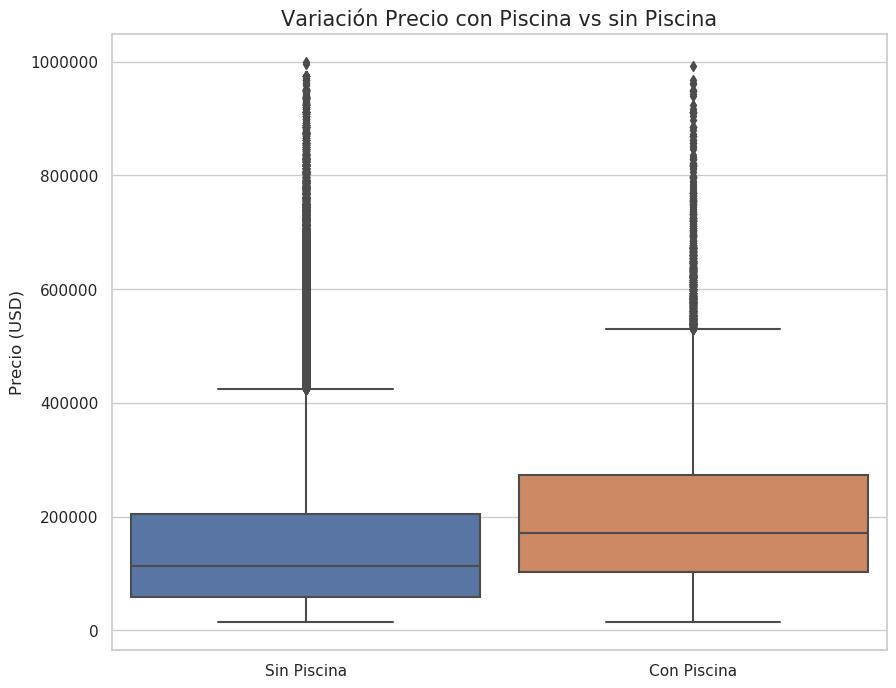

In [74]:
sns.boxplot(x=piscina.piscina, y=piscina.Precio_USD, data=piscina, width=0.9)
plt.title('Variación Precio con Piscina vs sin Piscina', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('', fontsize = 12)

### Usos multiples

In [13]:
usosmultiples = df_props_full.loc[:,['usosmultiples','tipodepropiedad','Precio_MEX','Precio_USD']]
# Verifico que tipo de propiedades suelen tener usosmultiples para filtrar datos
usosmultiples.loc[usosmultiples.usosmultiples == 1].tipodepropiedad.value_counts()

Apartamento                6187
Casa                       5099
Casa en condominio         1907
Departamento Compartido      26
Oficina comercial             2
Edificio                      1
Name: tipodepropiedad, dtype: int64

In [14]:
tiposConUsos = usosmultiples.loc[usosmultiples.usosmultiples == 1].tipodepropiedad.value_counts().index.array
tiposConUsos

<PandasArray>
[            'Apartamento',                    'Casa',
      'Casa en condominio', 'Departamento Compartido',
       'Oficina comercial',                'Edificio']
Length: 6, dtype: object

In [15]:
# Descarto las publicaciones que no pertenecen a tipos con piscina
usosmultiples = usosmultiples[usosmultiples.tipodepropiedad.apply(lambda x: x in tiposConUsos)]
usosmultiples['usosmultiples'] = usosmultiples['usosmultiples'].apply(lambda x: 'Con Usos Múltiples' if x == 1 else 'Sin Usos Múltiples')
print(len(usosmultiples))
usosmultiples.head()

221633


,usosmultiples,tipodepropiedad,Precio_MEX,Precio_USD
0,Sin Usos Múltiples,Apartamento,950000,68400
1,Sin Usos Múltiples,Casa,970000,69840
2,Sin Usos Múltiples,Casa,6500000,467999
3,Sin Usos Múltiples,Casa en condominio,3590000,258479
4,Sin Usos Múltiples,Casa,1120000,80640


Text(0.5, 0, '')

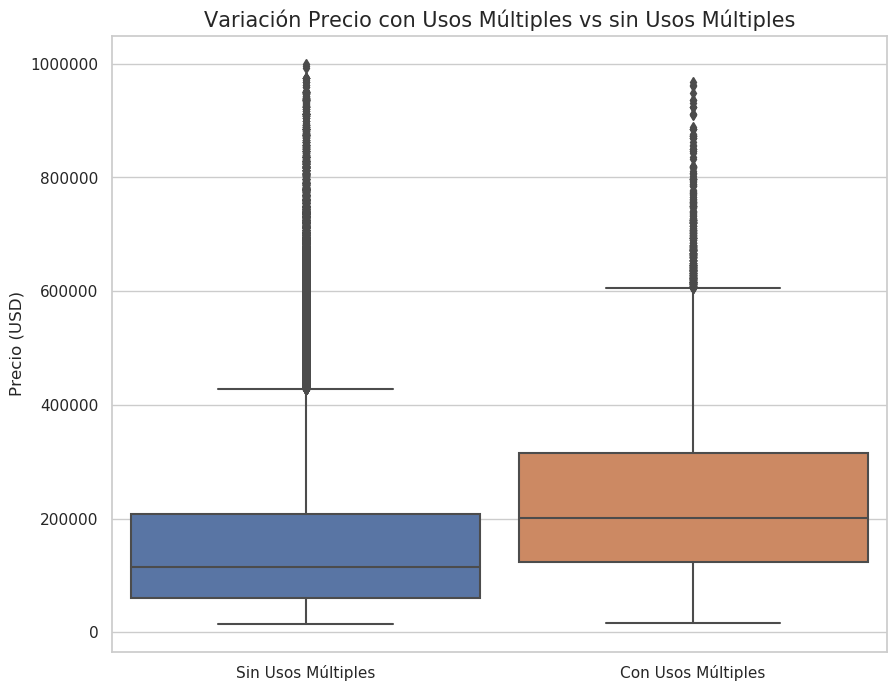

In [75]:
sns.boxplot(x=usosmultiples.usosmultiples, y=usosmultiples.Precio_USD, data=usosmultiples, width=0.9)
plt.title('Variación Precio con Usos Múltiples vs sin Usos Múltiples', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('', fontsize = 12)

### Gimnasio

In [17]:
gimnasio = df_props_full.loc[:,['gimnasio','tipodepropiedad','Precio_MEX','Precio_USD']]
# Verifico que tipo de propiedades suelen tener gimnasio para filtrar datos
print(len(gimnasio))
gimnasio.loc[gimnasio.gimnasio == 1].tipodepropiedad.value_counts()

240000


Apartamento                7591
Casa                       6105
Casa en condominio         1262
Departamento Compartido      34
Terreno                       1
Oficina comercial             1
Name: tipodepropiedad, dtype: int64

In [18]:
tiposConGimnasio = gimnasio.loc[gimnasio.gimnasio == 1].tipodepropiedad.value_counts().index.array
tiposConGimnasio

<PandasArray>
[            'Apartamento',                    'Casa',
      'Casa en condominio', 'Departamento Compartido',
                 'Terreno',       'Oficina comercial']
Length: 6, dtype: object

In [19]:
# Descarto las publicaciones que no pertenecen a tipos con gimnasio
gimnasio = gimnasio[gimnasio.tipodepropiedad.apply(lambda x: x in tiposConGimnasio)]
gimnasio['gimnasio'] = gimnasio['gimnasio'].apply(lambda x: 'Con Gimnasio' if x == 1 else 'Sin Gimnasio')
print(len(gimnasio))
gimnasio.head()

230182


,gimnasio,tipodepropiedad,Precio_MEX,Precio_USD
0,Sin Gimnasio,Apartamento,950000,68400
1,Sin Gimnasio,Casa,970000,69840
2,Sin Gimnasio,Casa,6500000,467999
3,Sin Gimnasio,Casa en condominio,3590000,258479
4,Sin Gimnasio,Casa,1120000,80640


Text(0.5, 0, '')

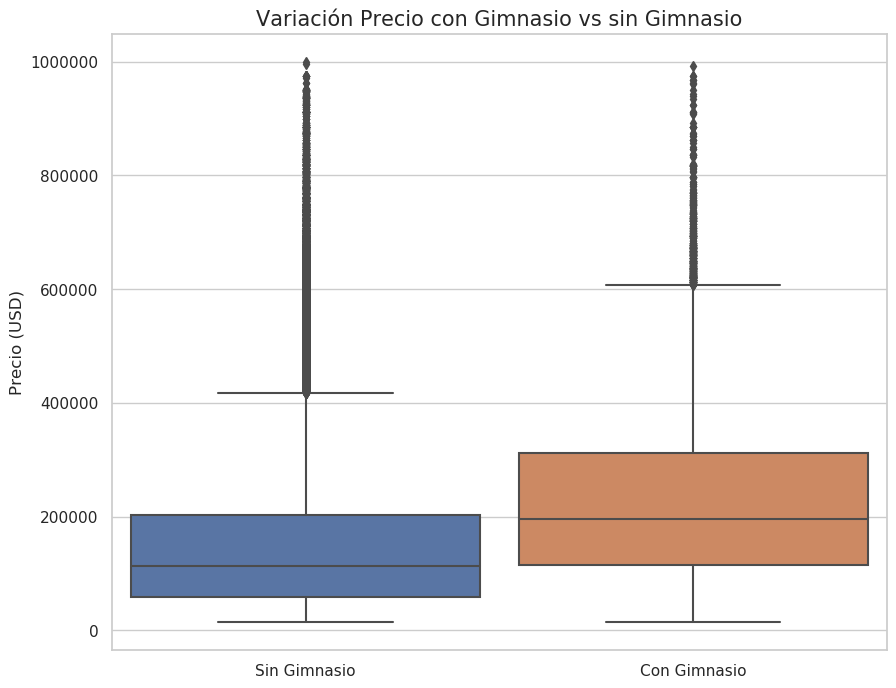

In [76]:
sns.boxplot(x=gimnasio.gimnasio, y=gimnasio.Precio_USD, data=gimnasio, width=0.9)
plt.title('Variación Precio con Gimnasio vs sin Gimnasio', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('', fontsize = 12)

## Gimnasio, Piscina y SUM

In [21]:
servicios = df_props_full.loc[:,['piscina','gimnasio','usosmultiples','tipodepropiedad','Precio_MEX','Precio_USD']]
# Verifico que tipo de propiedades suelen tener piscina y/o gimnasio y/o SUM para filtrar datos
print(len(servicios))
servicios.loc[(servicios.piscina == 1) | (servicios.gimnasio == 1) | (servicios.usosmultiples == 1)].tipodepropiedad.value_counts()

240000


Casa                       16363
Apartamento                12019
Casa en condominio          4391
Terreno                      490
Villa                        145
Quinta Vacacional            116
Departamento Compartido       43
Rancho                        14
Edificio                       2
Terreno comercial              2
Oficina comercial              2
Name: tipodepropiedad, dtype: int64

In [22]:
servicios.head()

,piscina,gimnasio,usosmultiples,tipodepropiedad,Precio_MEX,Precio_USD
0,0,0,0,Apartamento,950000,68400
1,0,0,0,Casa,970000,69840
2,0,0,0,Casa,6500000,467999
3,0,0,0,Casa en condominio,3590000,258479
4,0,0,0,Casa,1120000,80640


In [23]:
tiposConServicios = servicios.loc[(servicios.piscina == 1) | (servicios.gimnasio == 1) | (servicios.usosmultiples == 1)].tipodepropiedad.value_counts().index.array
tiposConServicios

<PandasArray>
[                   'Casa',             'Apartamento',
      'Casa en condominio',                 'Terreno',
                   'Villa',       'Quinta Vacacional',
 'Departamento Compartido',                  'Rancho',
                'Edificio',       'Terreno comercial',
       'Oficina comercial']
Length: 11, dtype: object

In [24]:
def serviciosDisponibles(row):
    # row[0] == 'piscina'  - row[1] == 'gimnasio' - row[2] == 'usosmultiples'
    if ((row[0] == 1) & (row[1]==1) & (row[2]==1)):
        return 'Todos'
    if ((row[0] == 1) & (row[1]==1)):
        return 'Piscina y Gimnasio'
    if ((row[0] == 1) & (row[2]==1)):
        return 'Piscina y SUM'
    if ((row[2] == 1) & (row[1]==1)):
        return 'SUM y Gimnasio'
    if (row[0] == 1):
        return 'Piscina'
    if (row[1] == 1):
        return 'Gimnasio'
    if (row[2] == 1):
        return 'SUM'
    return 'Ninguno'

In [25]:
# Descarto las publicaciones que no pertenecen a tipos con servicios
servicios = servicios[servicios.tipodepropiedad.apply(lambda x: x in tiposConServicios)]
servicios['servicios'] = servicios.apply(serviciosDisponibles, axis=1)
print(len(servicios))
servicios.head()

233809


,piscina,gimnasio,usosmultiples,tipodepropiedad,Precio_MEX,Precio_USD,servicios
0,0,0,0,Apartamento,950000,68400,Ninguno
1,0,0,0,Casa,970000,69840,Ninguno
2,0,0,0,Casa,6500000,467999,Ninguno
3,0,0,0,Casa en condominio,3590000,258479,Ninguno
4,0,0,0,Casa,1120000,80640,Ninguno


In [26]:
servicios.servicios.value_counts()

Ninguno               200222
Piscina                11708
Gimnasio                5618
SUM                     4988
Todos                   4327
Piscina y Gimnasio      3039
SUM y Gimnasio          2010
Piscina y SUM           1897
Name: servicios, dtype: int64

Text(0.5, 0, '')

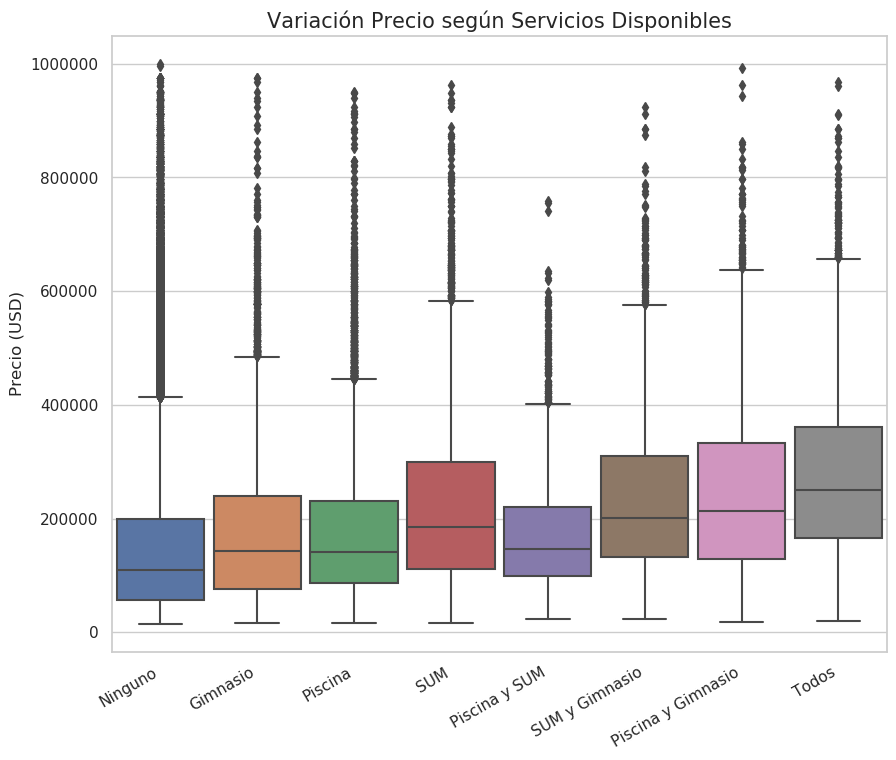

In [77]:
srv_fig = sns.boxplot(x=servicios.servicios, y=servicios.Precio_USD, data=servicios, width=0.9, \
            order=['Ninguno','Gimnasio','Piscina','SUM','Piscina y SUM','SUM y Gimnasio','Piscina y Gimnasio','Todos'])
srv_fig.set_xticklabels(srv_fig.get_xticklabels(), rotation=30, ha="right")


plt.title('Variación Precio según Servicios Disponibles', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('', fontsize = 12)

Text(0.5, 0, 'Servicio Ofrecido')

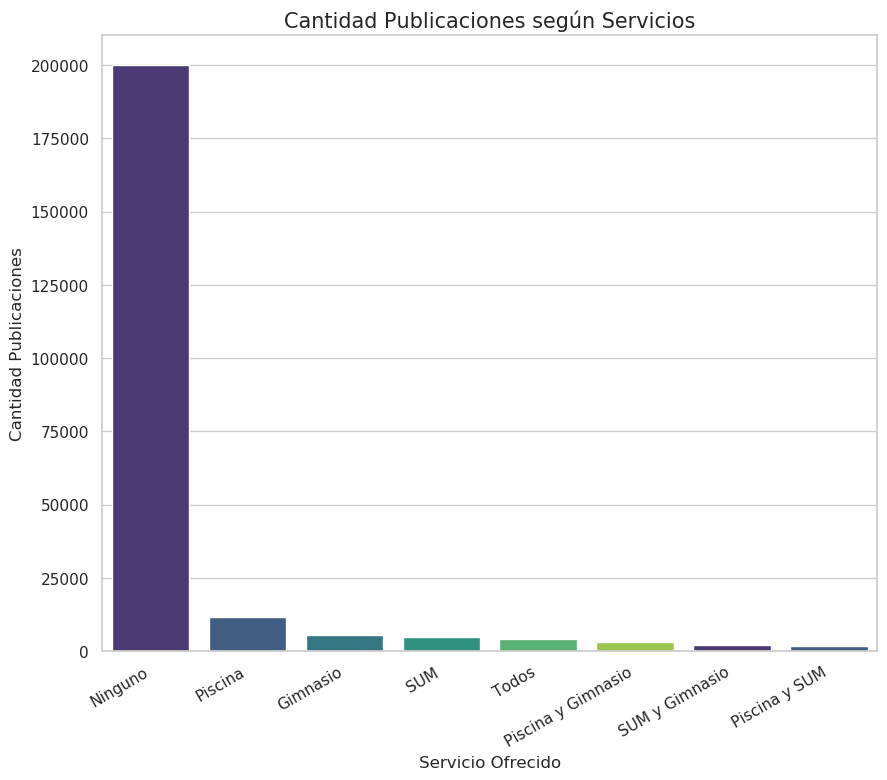

In [78]:
serv = servicios.servicios.value_counts().to_frame().reset_index()
serv.columns = ['prop','serv']

srv_bar = sns.barplot(data=serv, x='prop',y='serv', orient='v', palette = (sns.color_palette("viridis",)))
srv_bar.set_xticklabels(srv_bar.get_xticklabels(), rotation=30, ha="right")

plt.title('Cantidad Publicaciones según Servicios', fontsize = 15)
plt.ylabel('Cantidad Publicaciones', fontsize = 12)
plt.xlabel('Servicio Ofrecido', fontsize = 12)

# Distribución Preción Según Cercanía

## Escuelas Cercanas

In [29]:
escuelascercanas = df_props_full.loc[:,['escuelascercanas','tipodepropiedad','Precio_MEX','Precio_USD']]
# Verifico que tipo de propiedades suelen tener escuelascercanas para filtrar datos
print(len(escuelascercanas))
escuelascercanas.loc[escuelascercanas.escuelascercanas == 1].tipodepropiedad.value_counts()

240000


Casa                             64553
Apartamento                      26315
Casa en condominio                9624
Terreno                           3510
Local Comercial                    700
Edificio                           427
Oficina comercial                  419
Casa uso de suelo                  231
Bodega comercial                   220
Terreno comercial                  189
Inmuebles productivos urbanos       99
Departamento Compartido             86
Villa                               76
Local en centro comercial           67
Quinta Vacacional                   57
Rancho                              15
Duplex                               4
Huerta                               2
Name: tipodepropiedad, dtype: int64

In [30]:
tiposConEscuelasCercanas = escuelascercanas.loc[escuelascercanas.escuelascercanas == 1].tipodepropiedad.value_counts().index.array
tiposConEscuelasCercanas

<PandasArray>
[                         'Casa',                   'Apartamento',
            'Casa en condominio',                       'Terreno',
               'Local Comercial',                      'Edificio',
             'Oficina comercial',             'Casa uso de suelo',
              'Bodega comercial',             'Terreno comercial',
 'Inmuebles productivos urbanos',       'Departamento Compartido',
                         'Villa',     'Local en centro comercial',
             'Quinta Vacacional',                        'Rancho',
                        'Duplex',                        'Huerta']
Length: 18, dtype: object

In [31]:
# Descarto las publicaciones que no pertenecen a tipos con escuelascercanas
escuelascercanas = escuelascercanas[escuelascercanas.tipodepropiedad.apply(lambda x: x in tiposConEscuelasCercanas)]
escuelascercanas['escuelascercanas'] = escuelascercanas['escuelascercanas'].apply(lambda x: 'Con Escuelas Cercanas' if x == 1 else 'Sin Escuelas Cercanas')
print(len(escuelascercanas))
escuelascercanas.head()

239706


,escuelascercanas,tipodepropiedad,Precio_MEX,Precio_USD
0,Con Escuelas Cercanas,Apartamento,950000,68400
1,Sin Escuelas Cercanas,Casa,970000,69840
2,Con Escuelas Cercanas,Casa,6500000,467999
3,Con Escuelas Cercanas,Casa en condominio,3590000,258479
4,Con Escuelas Cercanas,Casa,1120000,80640


Text(0.5, 0, '')

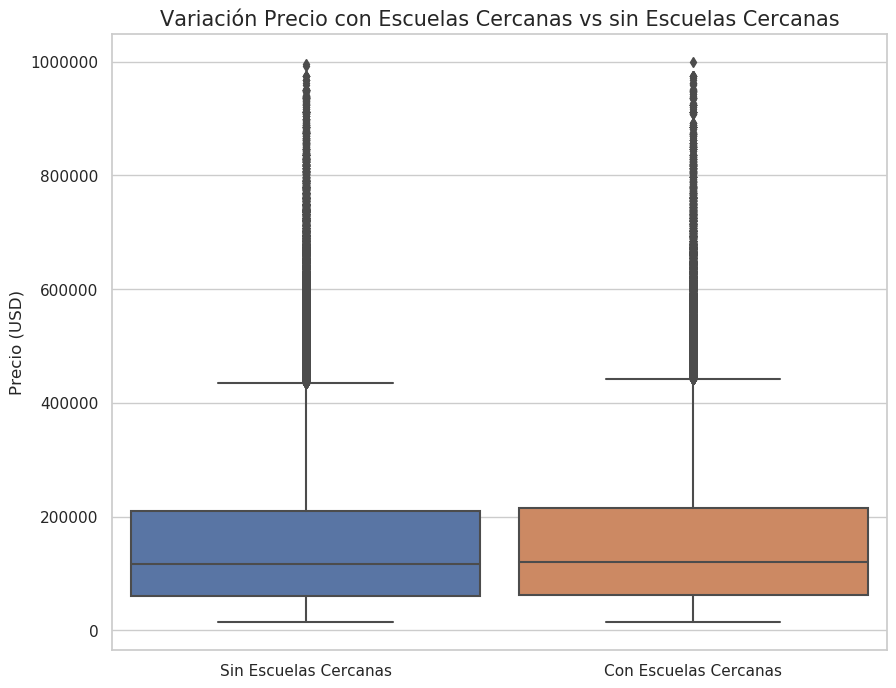

In [79]:
sns.boxplot(x=escuelascercanas.escuelascercanas, y=escuelascercanas.Precio_USD, data=escuelascercanas, width=0.9, order=['Sin Escuelas Cercanas','Con Escuelas Cercanas'])
plt.title('Variación Precio con Escuelas Cercanas vs sin Escuelas Cercanas', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('', fontsize = 12)

## Centros Comerciales Cercanos

In [33]:
centroscercanos = df_props_full.loc[:,['centroscomercialescercanos','tipodepropiedad','Precio_MEX','Precio_USD']]
# Verifico que tipo de propiedades suelen tener centroscomercialescercanos para filtrar datos
print(len(centroscercanos))
centroscercanos.loc[centroscercanos.centroscomercialescercanos == 1].tipodepropiedad.value_counts()

240000


Casa                             54641
Apartamento                      25852
Casa en condominio                8869
Terreno                           3075
Local Comercial                    732
Oficina comercial                  508
Edificio                           438
Bodega comercial                   237
Casa uso de suelo                  224
Terreno comercial                  190
Departamento Compartido             94
Inmuebles productivos urbanos       88
Villa                               84
Local en centro comercial           80
Quinta Vacacional                   40
Rancho                              10
Duplex                               3
Huerta                               3
Name: tipodepropiedad, dtype: int64

In [34]:
tiposConCentrosCercanos = centroscercanos.loc[centroscercanos.centroscomercialescercanos == 1].tipodepropiedad.value_counts().index.array
tiposConCentrosCercanos

<PandasArray>
[                         'Casa',                   'Apartamento',
            'Casa en condominio',                       'Terreno',
               'Local Comercial',             'Oficina comercial',
                      'Edificio',              'Bodega comercial',
             'Casa uso de suelo',             'Terreno comercial',
       'Departamento Compartido', 'Inmuebles productivos urbanos',
                         'Villa',     'Local en centro comercial',
             'Quinta Vacacional',                        'Rancho',
                        'Duplex',                        'Huerta']
Length: 18, dtype: object

In [35]:
# Descarto las publicaciones que no pertenecen a tipos con escuelascercanas
centroscercanos = centroscercanos[centroscercanos.tipodepropiedad.apply(lambda x: x in tiposConCentrosCercanos)]
centroscercanos['centroscomercialescercanos'] = centroscercanos['centroscomercialescercanos'].apply(lambda x: 'Con Centros Comerciales Cercanos' if x == 1 else 'Sin Centros Comerciales Cercanos')
print(len(centroscercanos))
centroscercanos.head()

239706


,centroscomercialescercanos,tipodepropiedad,Precio_MEX,Precio_USD
0,Sin Centros Comerciales Cercanos,Apartamento,950000,68400
1,Sin Centros Comerciales Cercanos,Casa,970000,69840
2,Con Centros Comerciales Cercanos,Casa,6500000,467999
3,Con Centros Comerciales Cercanos,Casa en condominio,3590000,258479
4,Con Centros Comerciales Cercanos,Casa,1120000,80640


Text(0.5, 0, '')

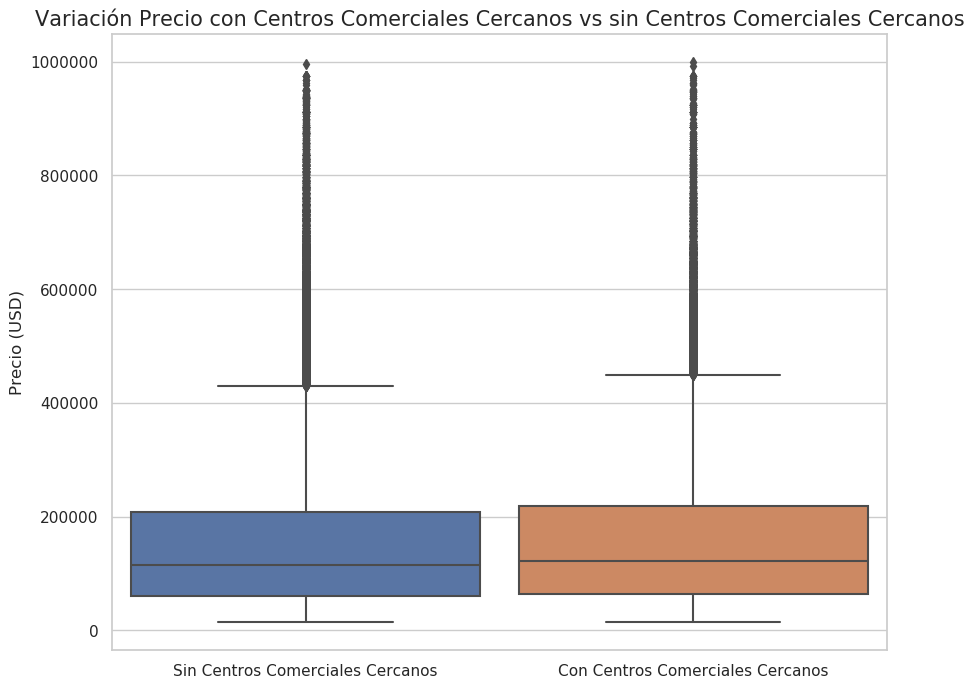

In [80]:
sns.boxplot(x=centroscercanos.centroscomercialescercanos, y=centroscercanos.Precio_USD, data=centroscercanos, width=0.9, order=['Sin Centros Comerciales Cercanos','Con Centros Comerciales Cercanos'])
plt.title('Variación Precio con Centros Comerciales Cercanos vs sin Centros Comerciales Cercanos', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('', fontsize = 12)

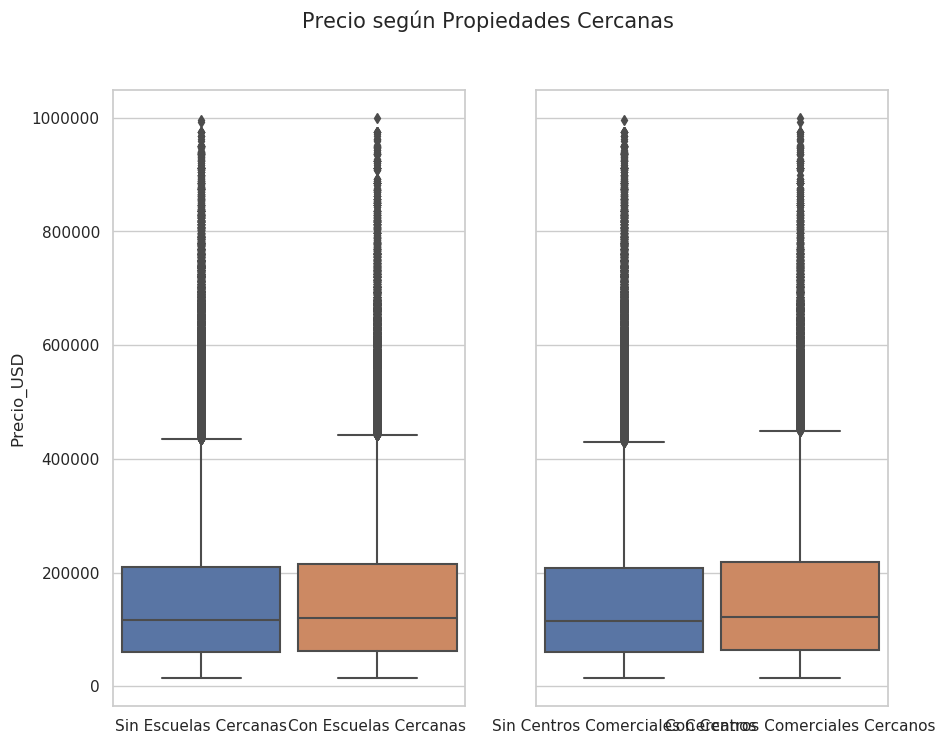

In [81]:
fig1, axes1 = plt.subplots(1,2, sharey='row')
sns.boxplot(ax=axes1[0], x=escuelascercanas.escuelascercanas, y=escuelascercanas.Precio_USD, data=escuelascercanas, width=0.9, order=['Sin Escuelas Cercanas','Con Escuelas Cercanas'])
sns.boxplot(ax=axes1[1], x=centroscercanos.centroscomercialescercanos, y=centroscercanos.Precio_USD, data=centroscercanos, width=0.9, order=['Sin Centros Comerciales Cercanos','Con Centros Comerciales Cercanos'])

axes1[0].set_xlabel('')
axes1[1].set_ylabel('Precio (USD)', fontsize = 12)

axes1[1].set_xlabel('')
axes1[1].set_ylabel('')

fig1.suptitle('Precio según Propiedades Cercanas', fontsize = 15)
# fig1.supylabel('Precio (USD)', fontsize = 12)
# fig1.supxlabel('', fontsize = 12)
plt.show()

## Escuelas y Centros

In [38]:
escuelasYCentros = df_props_full.loc[:,['centroscomercialescercanos','escuelascercanas','tipodepropiedad','Precio_MEX','Precio_USD']]
# Verifico que tipo de propiedades suelen tener centroscomercialescercanos y/o escuelascercanas para filtrar datos
print(len(escuelasYCentros))
escuelasYCentros.loc[(escuelasYCentros.centroscomercialescercanos == 1) | (escuelasYCentros.escuelascercanas == 1)].tipodepropiedad.value_counts()

240000


Casa                             67940
Apartamento                      28827
Casa en condominio               10188
Terreno                           3793
Local Comercial                    851
Oficina comercial                  528
Edificio                           488
Bodega comercial                   270
Casa uso de suelo                  257
Terreno comercial                  222
Inmuebles productivos urbanos      104
Departamento Compartido            100
Villa                               99
Local en centro comercial           92
Quinta Vacacional                   63
Rancho                              18
Duplex                               4
Huerta                               3
Name: tipodepropiedad, dtype: int64

In [39]:
escuelasYCentros.head()

,centroscomercialescercanos,escuelascercanas,tipodepropiedad,Precio_MEX,Precio_USD
0,0,1,Apartamento,950000,68400
1,0,0,Casa,970000,69840
2,1,1,Casa,6500000,467999
3,1,1,Casa en condominio,3590000,258479
4,1,1,Casa,1120000,80640


In [40]:
tiposConPropsCercanas = escuelasYCentros.loc[(escuelasYCentros.centroscomercialescercanos == 1) | (escuelasYCentros.escuelascercanas == 1)].tipodepropiedad.value_counts().index.array
tiposConPropsCercanas

<PandasArray>
[                         'Casa',                   'Apartamento',
            'Casa en condominio',                       'Terreno',
               'Local Comercial',             'Oficina comercial',
                      'Edificio',              'Bodega comercial',
             'Casa uso de suelo',             'Terreno comercial',
 'Inmuebles productivos urbanos',       'Departamento Compartido',
                         'Villa',     'Local en centro comercial',
             'Quinta Vacacional',                        'Rancho',
                        'Duplex',                        'Huerta']
Length: 18, dtype: object

In [41]:
def propiedadCercana(row):
    # row[0] == 'centroscomercialescercanos'  - row[1] == 'escuelascercanas'
    if ((row[0] == 1) & (row[1]==1)):
        return 'Ambos'
    if (row[0] == 1):
        return 'Centros Comerciales'
    if (row[1] == 1):
        return 'Escuelas'
    return 'Ninguno'

In [42]:
# Descarto las publicaciones que no pertenecen a tipos con escuelascercanas
escuelasYCentros = escuelasYCentros[escuelasYCentros.tipodepropiedad.apply(lambda x: x in tiposConCentrosCercanos)]
escuelasYCentros['cercanos'] = escuelasYCentros.apply(propiedadCercana, axis=1)
print(len(escuelasYCentros))
escuelasYCentros.head()

239706


,centroscomercialescercanos,escuelascercanas,tipodepropiedad,Precio_MEX,Precio_USD,cercanos
0,0,1,Apartamento,950000,68400,Escuelas
1,0,0,Casa,970000,69840,Ninguno
2,1,1,Casa,6500000,467999,Ambos
3,1,1,Casa en condominio,3590000,258479,Ambos
4,1,1,Casa,1120000,80640,Ambos


In [43]:
escuelasYCentros.cercanos.value_counts()

Ninguno                125859
Ambos                   87915
Escuelas                18679
Centros Comerciales      7253
Name: cercanos, dtype: int64

Text(0.5, 0, '')

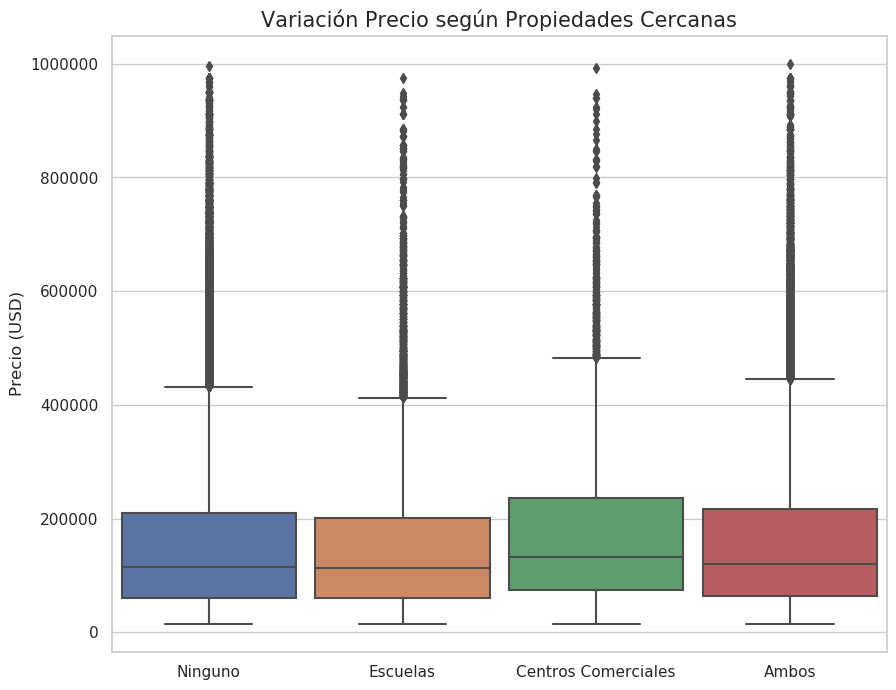

In [82]:
sns.boxplot(x=escuelasYCentros.cercanos, y=escuelasYCentros.Precio_USD, data=escuelasYCentros, width=0.9, order=['Ninguno','Escuelas','Centros Comerciales','Ambos'])
plt.title('Variación Precio según Propiedades Cercanas', fontsize = 15)
plt.ylabel('Precio (USD)', fontsize = 12)
plt.xlabel('', fontsize = 12)

Text(0.5, 0, 'Propiedades Cercanas')

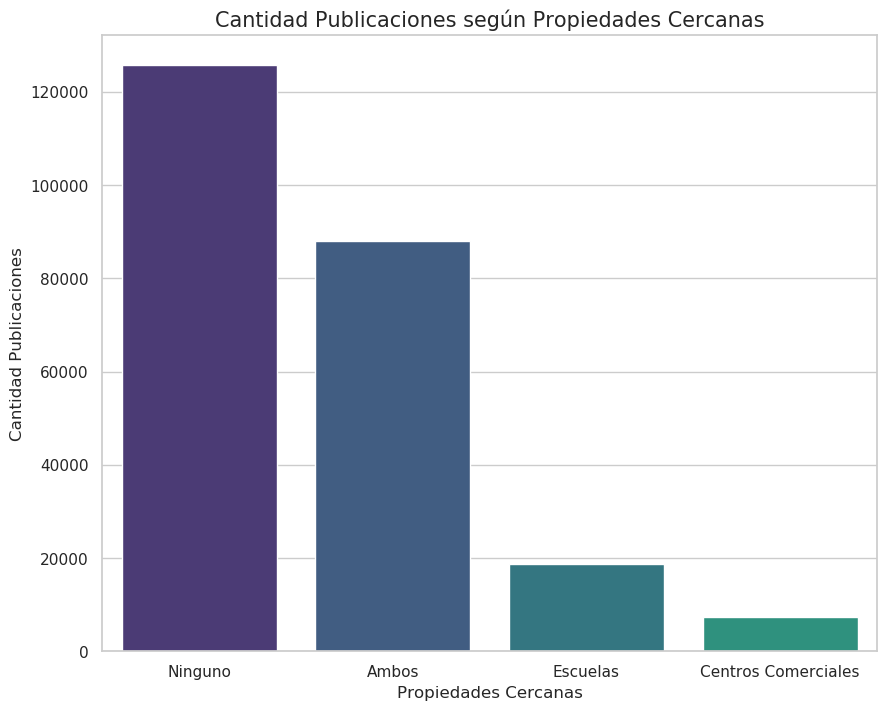

In [83]:
cerc = escuelasYCentros.cercanos.value_counts().to_frame().reset_index()
cerc.columns = ['prop','pubs']
sns.barplot(data=cerc, x='prop',y='pubs', orient='v', palette = (sns.color_palette("viridis",)))
plt.title('Cantidad Publicaciones según Propiedades Cercanas', fontsize = 15)
plt.ylabel('Cantidad Publicaciones', fontsize = 12)
plt.xlabel('Propiedades Cercanas', fontsize = 12)

# Servicios/Cercanías según el tipo de Propiedad

In [65]:
pubsPorTipoYCaracteristica = df_props_full.groupby('tipodepropiedad').agg({'piscina':'sum','gimnasio':'sum','usosmultiples':'sum','escuelascercanas':'sum','centroscomercialescercanos':'sum'})
pubsPorTipoYCaracteristica

,piscina,gimnasio,usosmultiples,escuelascercanas,centroscomercialescercanos
tipodepropiedad,,,,,
Apartamento,"8,095.000","7,591.000","6,187.000","26,315.000","25,852.000"
Bodega comercial,0.000,0.000,0.000,220.000,237.000
Casa,"9,109.000","6,105.000","5,099.000","64,553.000","54,641.000"
Casa en condominio,"2,973.000","1,262.000","1,907.000","9,624.000","8,869.000"
Casa uso de suelo,0.000,0.000,0.000,231.000,224.000
Departamento Compartido,26.000,34.000,26.000,86.000,94.000
Duplex,0.000,0.000,0.000,4.000,3.000
Edificio,1.000,0.000,1.000,427.000,438.000
Garage,0.000,0.000,0.000,0.000,0.000


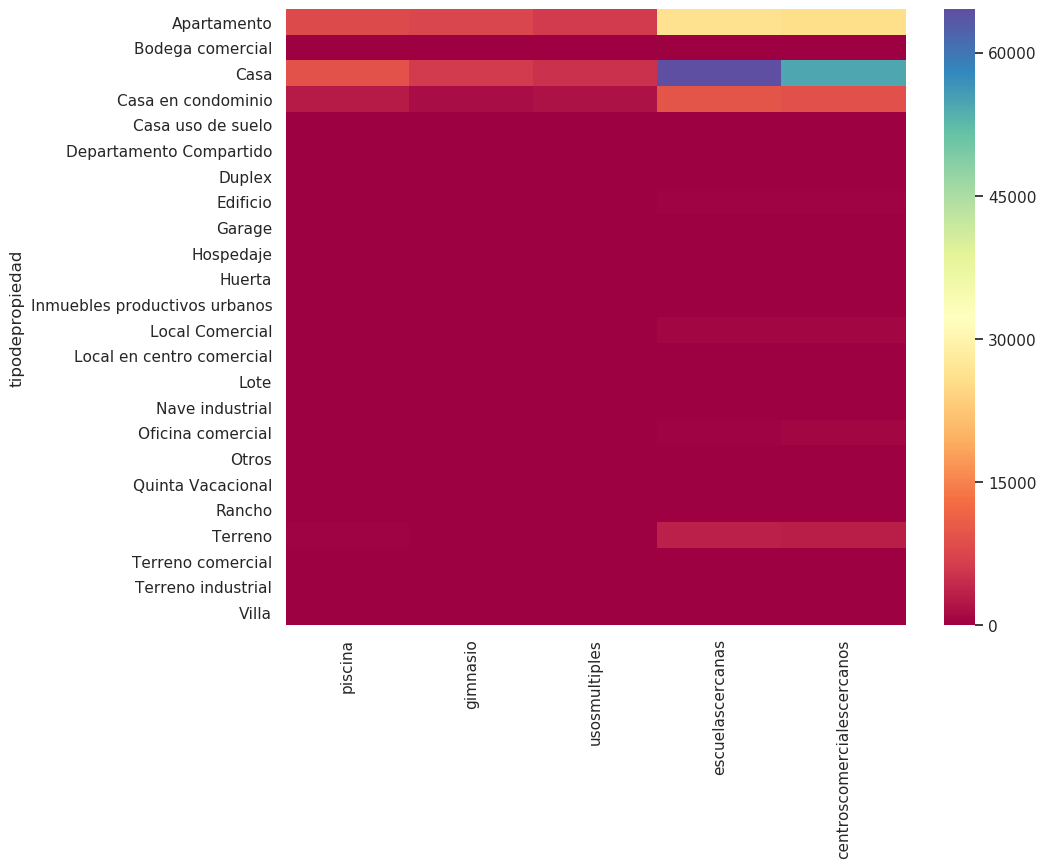

In [84]:
sns.heatmap(pubsPorTipoYCaracteristica, cmap='Spectral', annot = False)